In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load dataet

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# 
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
# dependent and independent dataset

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values


In [10]:
# split data into train test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 0)

In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Firstly thing is that Here we don't know exact value of neigbors so initially we are start with k = 1**


In [18]:
# fitting KNN to train set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# metric minkowski  is euclidean distance matrix in multidimensional with p = 2
# using p= 2 we  can select euclidean distance in sklearn

KNeighborsClassifier(n_neighbors=1)

In [19]:
# predict the test set
y_pred = classifier.predict(X_test)

In [24]:
# evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report  
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[61  7]
 [ 6 26]]
0.87


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.79      0.81      0.80        32

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



**With help of accuracy_rate we are finding out optimum NO. of K value**

In [26]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(estimator = knn , X = X_train, y = y_train, cv = 10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy Rate')

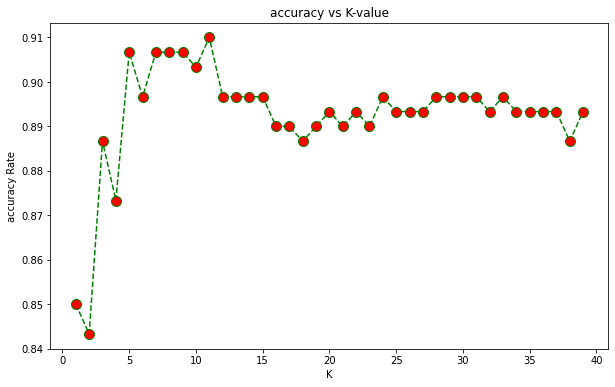

In [28]:
# plotting 
plt.figure(figsize =(10,6))
plt.plot(range(1,40), accuracy_rate, color = 'g', linestyle = 'dashed', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('accuracy vs K-value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

**With help of error_rate  we are finding out optimum NO. of K value**

In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.predict(X_test)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

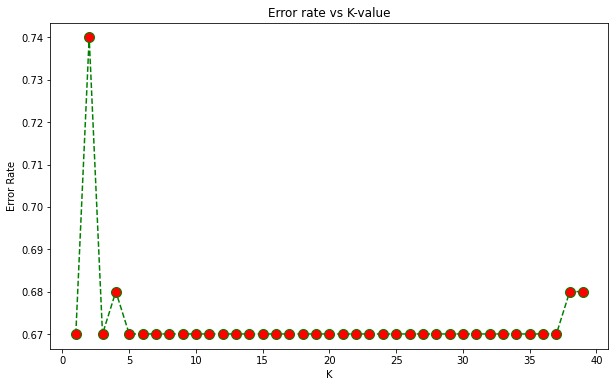

In [32]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color = 'g', linestyle = 'dashed', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')